## 1. Preparación de datos

In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Cargar el dataset
df = pd.read_csv("spotify_reviews_changed.csv", delimiter=',', quotechar='"', on_bad_lines='skip', encoding='ISO-8859-1')

In [ ]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import download

# Descargar recursos necesarios
download('punkt')
download('stopwords')
download('wordnet')

# Inicializar el lematizador y obtener stopwords en inglés
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar números y caracteres especiales
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenización
    tokens = word_tokenize(text)
    # Eliminar stopwords y lematizar
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Unir tokens en una sola cadena
    return ' '.join(tokens)

# Suponiendo que 'df' es tu DataFrame y 'content' es la columna con las reseñas
df['processed_content'] = df['content'].apply(preprocess_text)

# Preparar los datos
ratings = df['score'].values  # Suponiendo que tienes una columna 'rating'
texts = df['processed_content'].values # Extraer la lista de textos procesados

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Cargar el dataset
df = pd.read_csv("spotify_reviews_changed.csv", delimiter=',', quotechar='"', on_bad_lines='skip', encoding='ISO-8859-1')
# Preparar los datos
texts = df['content'].values  # Suponiendo que tienes una columna 'text'
ratings = df['score'].values  # Suponiendo que tienes una columna 'rating'

# Configuración
vocab_size = 1500  # Tamaño del vocabulario
max_length = 100    # Longitud máxima de las secuencias

# Tokenización
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=max_length, truncating='post')

# Convertir ratings a one-hot encoding
num_classes = 5
ratings_one_hot = to_categorical(ratings - 1, num_classes=num_classes)  # -1 porque los ratings empiezan en 1

# Dividir en conjunto de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, ratings_one_hot, test_size=0.2, random_state=42)


## 2. Construcción del modelo RNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM, Dropout, Dense,BatchNormalization,GlobalMaxPooling1D,Attention,LayerNormalization, MultiHeadAttention

# Definir el modelo
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=256, input_length=max_length),
    LSTM(128, return_sequences=True, dropout=0.5, recurrent_dropout=0.2),
    BatchNormalization(),
    LSTM(64, return_sequences=True, dropout=0.5, recurrent_dropout=0.2),
    GlobalMaxPooling1D(),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])
# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ ?                           │     0 (unbuilt) │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## 3. Entrenamiento del modelo

In [ ]:
num_epochs = 20
history = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_test, y_test))

Epoch 1/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 328s 287ms/step - accuracy: 0.2854 - loss: 1.5208 - val_accuracy: 0.4838 - val_loss: 1.1967
Epoch 2/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 400s 303ms/step - accuracy: 0.4748 - loss: 1.2143 - val_accuracy: 0.5100 - val_loss: 1.1306
Epoch 3/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 354s 278ms/step - accuracy: 0.5024 - loss: 1.1505 - val_accuracy: 0.5116 - val_loss: 1.1233
Epoch 4/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 322s 286ms/step - accuracy: 0.5190 - loss: 1.1234 - val_accuracy: 0.5194 - val_loss: 1.1310
Epoch 5/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 367s 274ms/step - accuracy: 0.5277 - loss: 1.1012 - val_accuracy: 0.5256 - val_loss: 1.0977
Epoch 6/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 324s 275ms/step - accuracy: 0.5298 - loss: 1.0926 - val_accuracy: 0.5248 - val_loss: 1.0932
Epoch 7/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 336s 288ms/step - accuracy: 0.5380 - loss: 1.0811 - val_accuracy: 0.5309 - val_loss: 1.0915
Epoch 8/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 336s 299ms/step - ac

## 4. Evaluación y Visualización

282/282 ━━━━━━━━━━━━━━━━━━━━ 25s 90ms/step - accuracy: 0.5375 - loss: 1.1050
Test loss: 1.1029
Test accuracy: 0.5401


<Axes: >

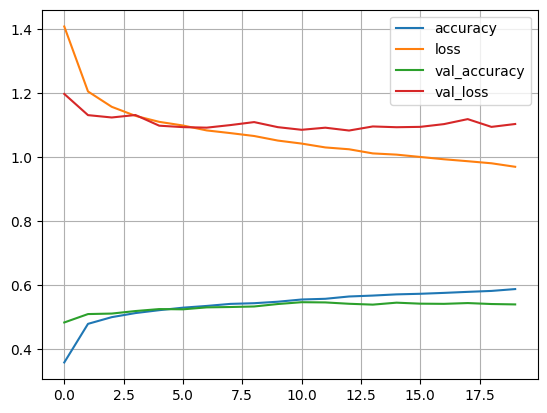

In [ ]:
# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

# Graficar el historial de entrenamiento:
pd.DataFrame(history.history).plot(grid=True)

282/282 ━━━━━━━━━━━━━━━━━━━━ 24s 84ms/step
Accuracy: 0.54
Precision: 0.54
Recall: 0.54
F1-Score: 0.54
Confusion Matrix:
[[1315  348  116   36   41]
 [ 549  660  368  103   32]
 [ 271  527  647  343   45]
 [ 105  158  338  914  258]
 [  68   35   57  341 1325]]


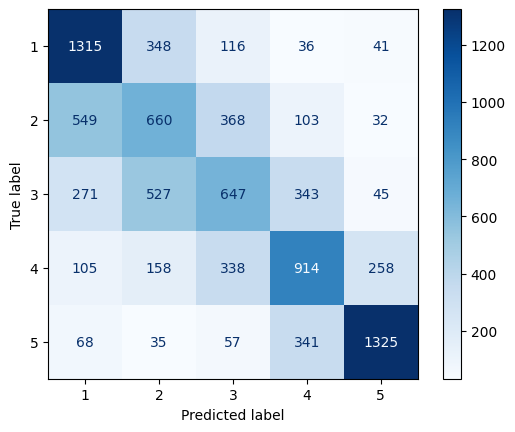

In [ ]:
import numpy as np
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay,accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, RocCurveDisplay)
# Obtener las predicciones del modelo sobre el conjunto de prueba
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Convertir las etiquetas de prueba a índices
y_test_int = np.argmax(y_test, axis=1)

# Calcular Métricas
accuracy = accuracy_score(y_test_int, predicted_labels)
precision = precision_score(y_test_int, predicted_labels, average='weighted')
recall = recall_score(y_test_int, predicted_labels, average='weighted')
f1 = f1_score(y_test_int, predicted_labels, average='weighted')

# Imprimir las métricas
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test_int, predicted_labels)
print('Confusion Matrix:')
print(conf_matrix)

import matplotlib.pyplot as plt
# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[1, 2, 3, 4, 5])
disp.plot(cmap=plt.cm.Blues)
plt.show()

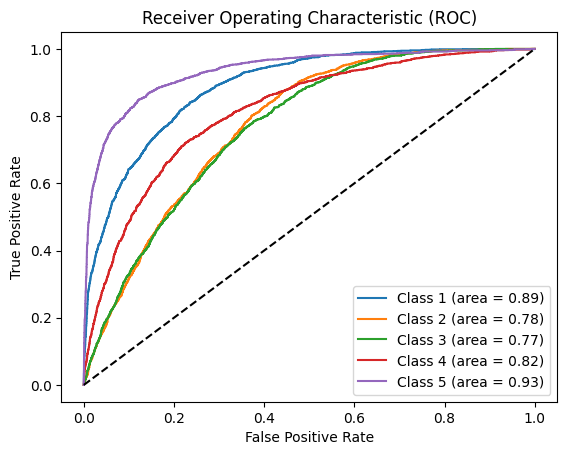

In [ ]:
# Calcular y graficar la curva ROC y AUC para cada clase
y_test_bin = np.copy(y_test)  # Convertir y_test a binario para la curva ROC
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], predictions[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i + 1} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()